# Выборка #2

In [1]:
%run init.py
%load_ext autoreload
%autoreload 2

### Обзор данных

In [2]:
dataset = Dataset(2)
dataset.summary()

+---------+-----------------------+----------------------+-------------+------------------+
| Выборка | Обучающая, # объектов | Тестовая, # объектов | # признаков | Доля класса 1, % |
+---------+-----------------------+----------------------+-------------+------------------+
|    2    |          1000         |         1000         |      20     |       46.9       |
+---------+-----------------------+----------------------+-------------+------------------+


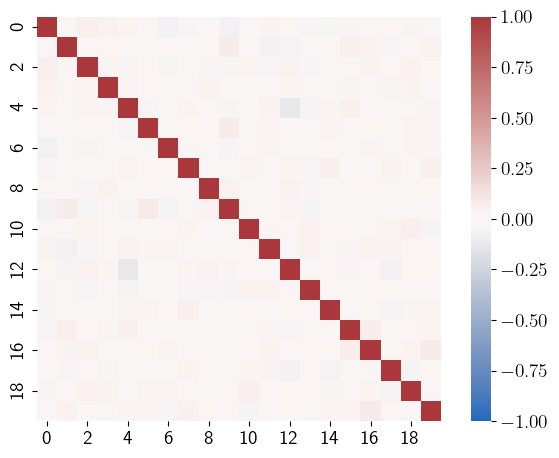

In [3]:
dataset.heatmap()

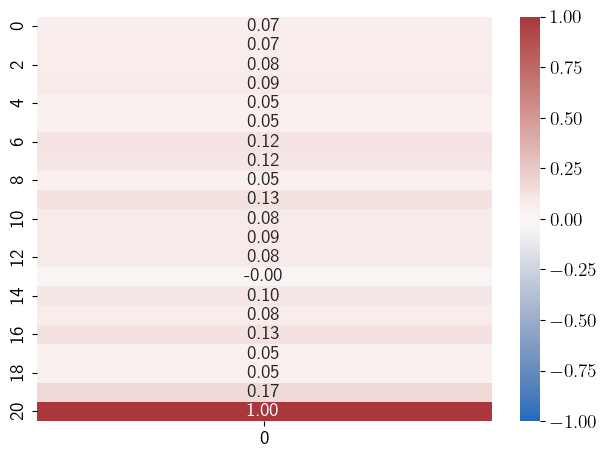

In [4]:
dataset.target_corr()

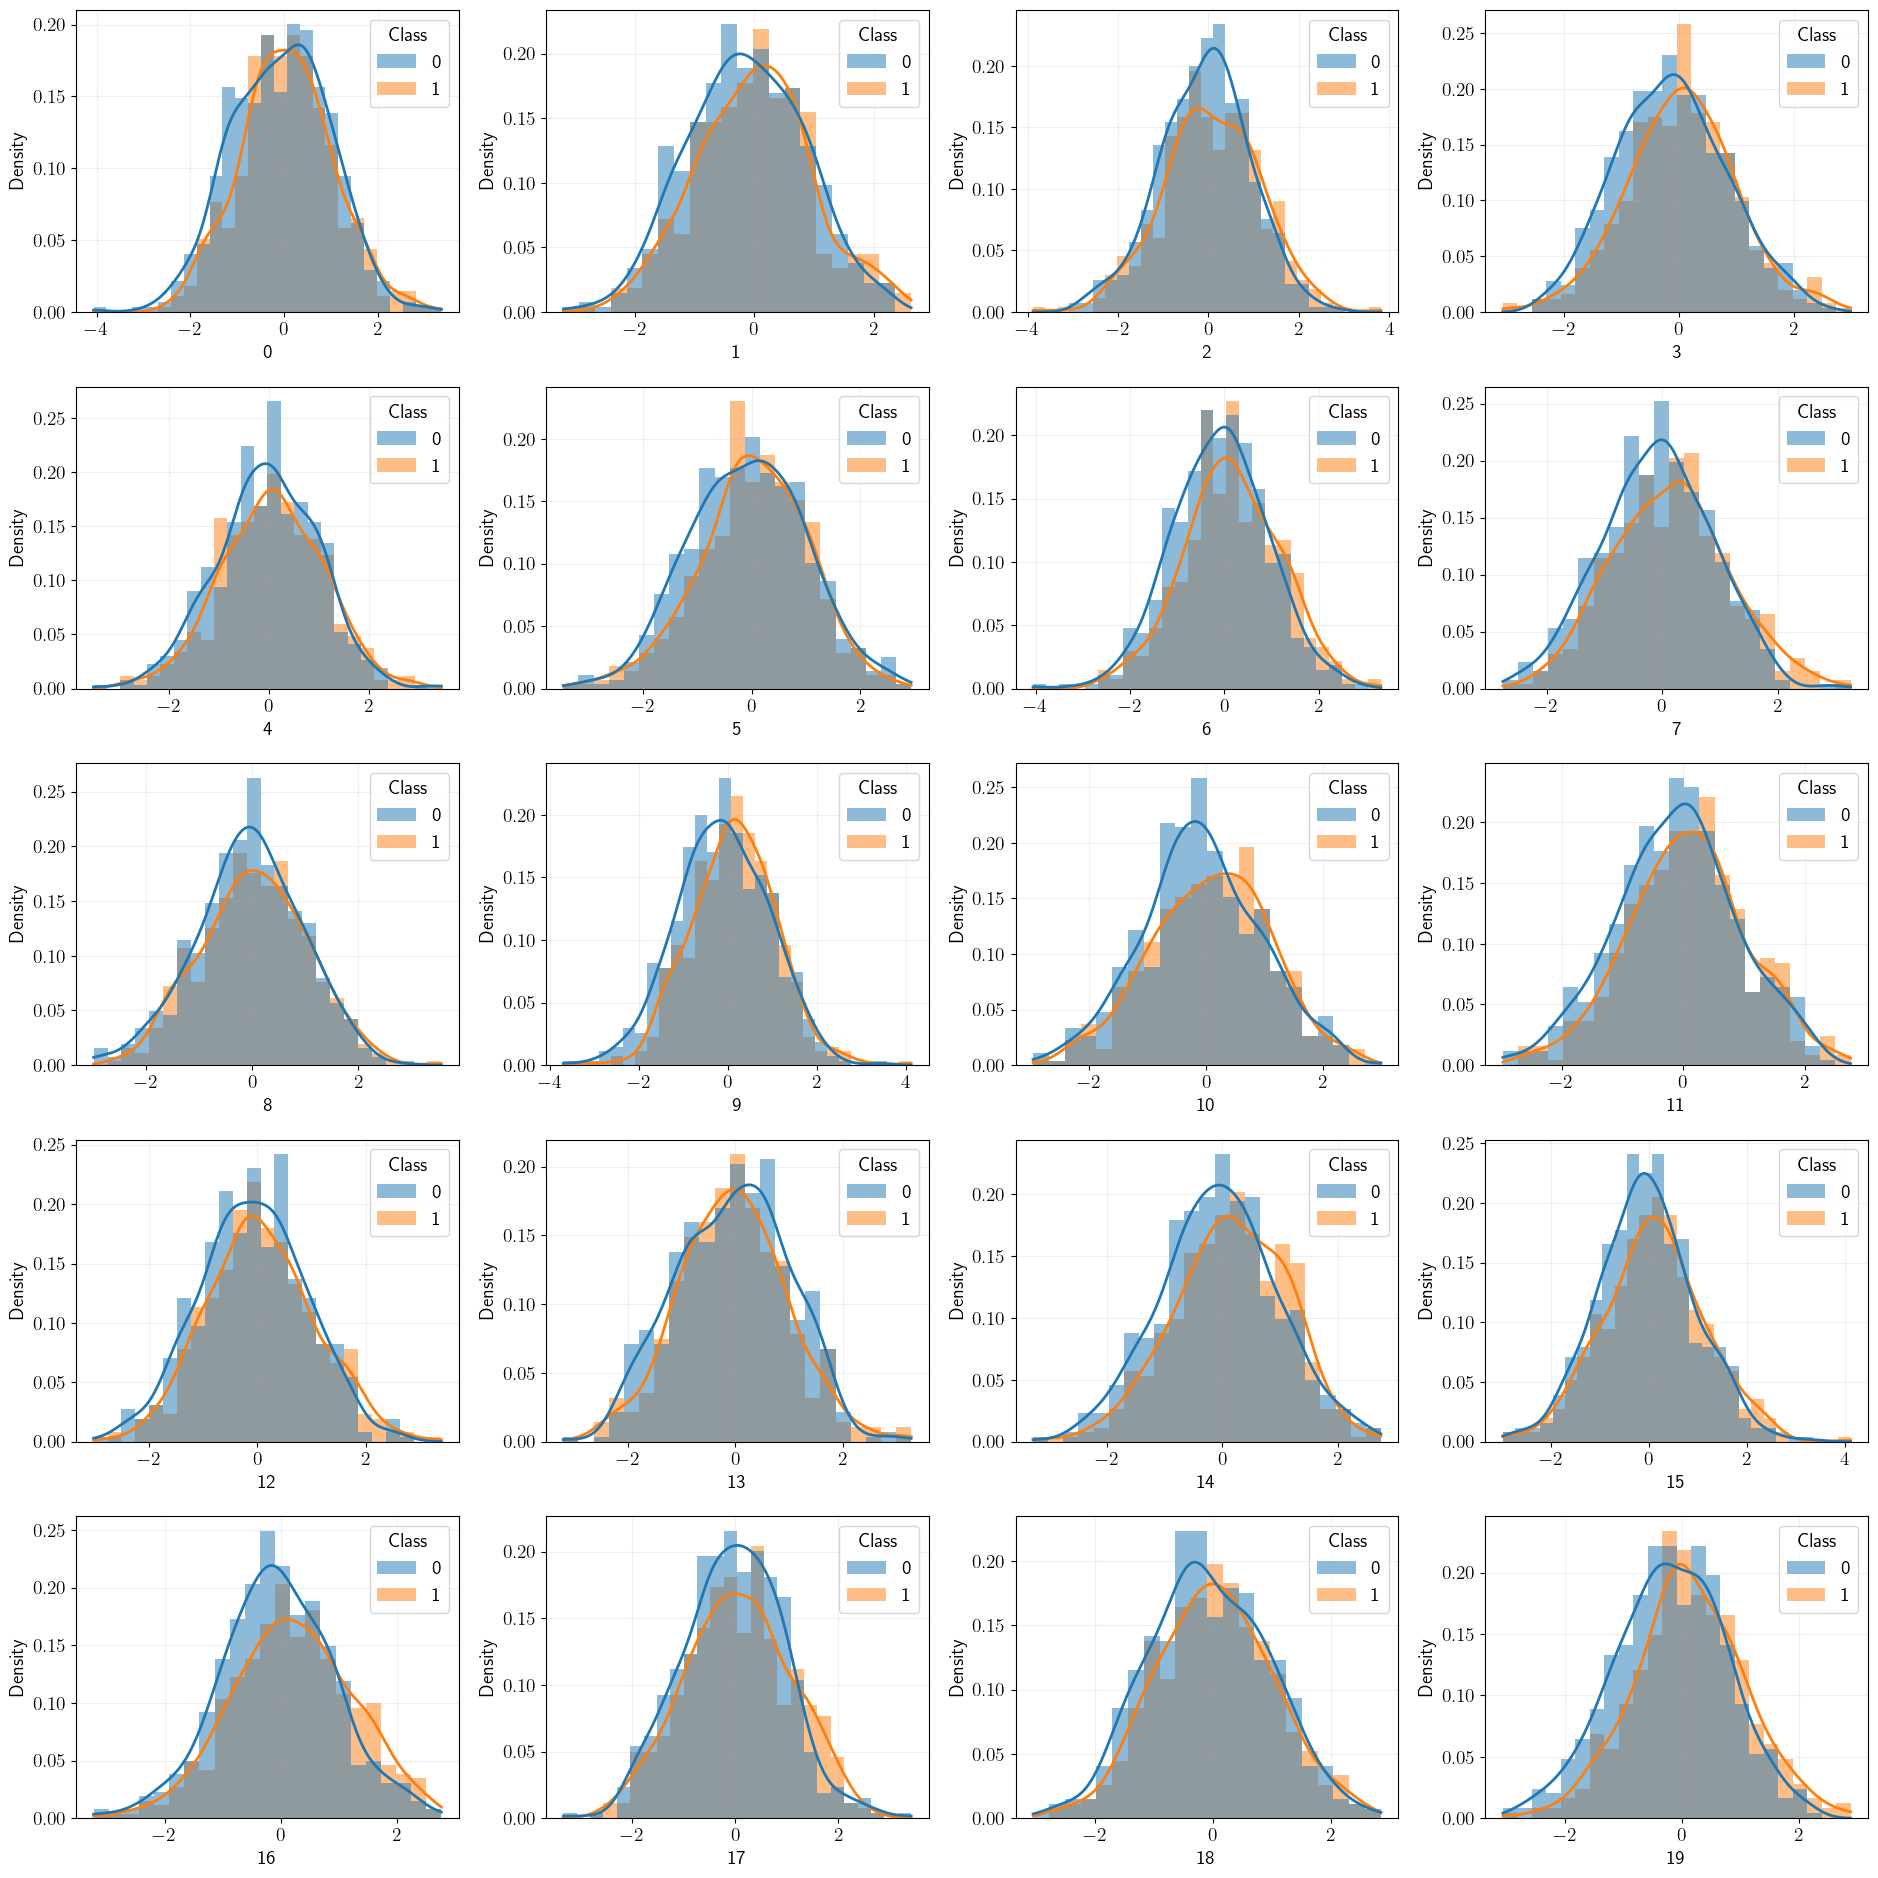

In [5]:
make_histplot(dataset.df)

### Проверка нормальности признаков

Используем критерий Шапиро-Уилка

In [6]:
pvals = [shapiro(dataset.X1[i])[1] for i in range(dataset.n_features)]

Получим достигаемые уровни значимости для нулевой гипотезы: "Распределение признака является нормальным"

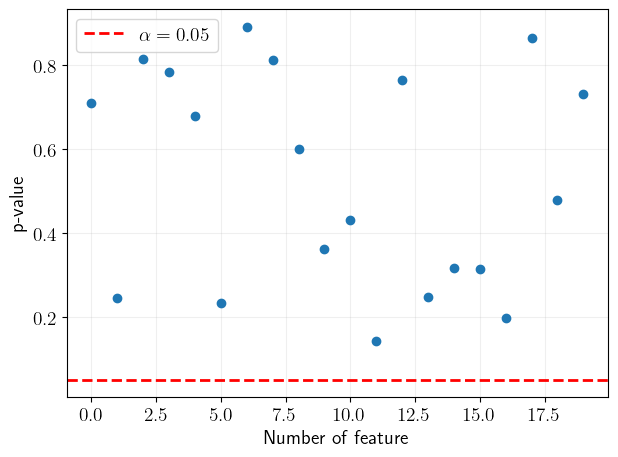

In [7]:
plt.plot(pvals, linestyle='None', marker='o')
plt.axhline(y=0.05, color='r', linestyle='dashed', label=r'$\alpha=0.05$')

plt.legend()
plt.xlabel('Number of feature')
plt.ylabel('p-value')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.savefig(f'./fig/dataset_{dataset.dataset_id}/shapiro.pdf', bbox_inches='tight')
plt.show()

### Logistic Regression

100%|██████████| 20/20 [00:03<00:00,  5.27it/s]


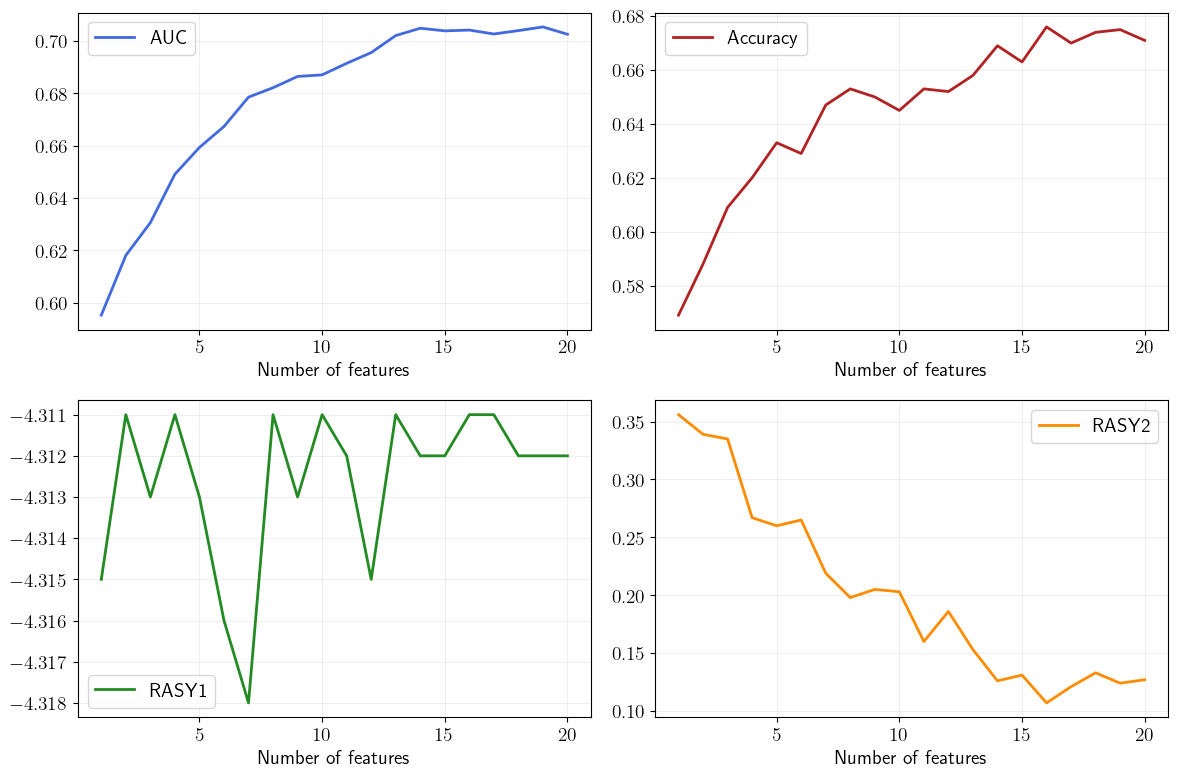

In [8]:
features_cols_lr = dataset.metrics_n_features_dependence(LogisticRegression())

100%|██████████| 11/11 [00:08<00:00,  1.35it/s]


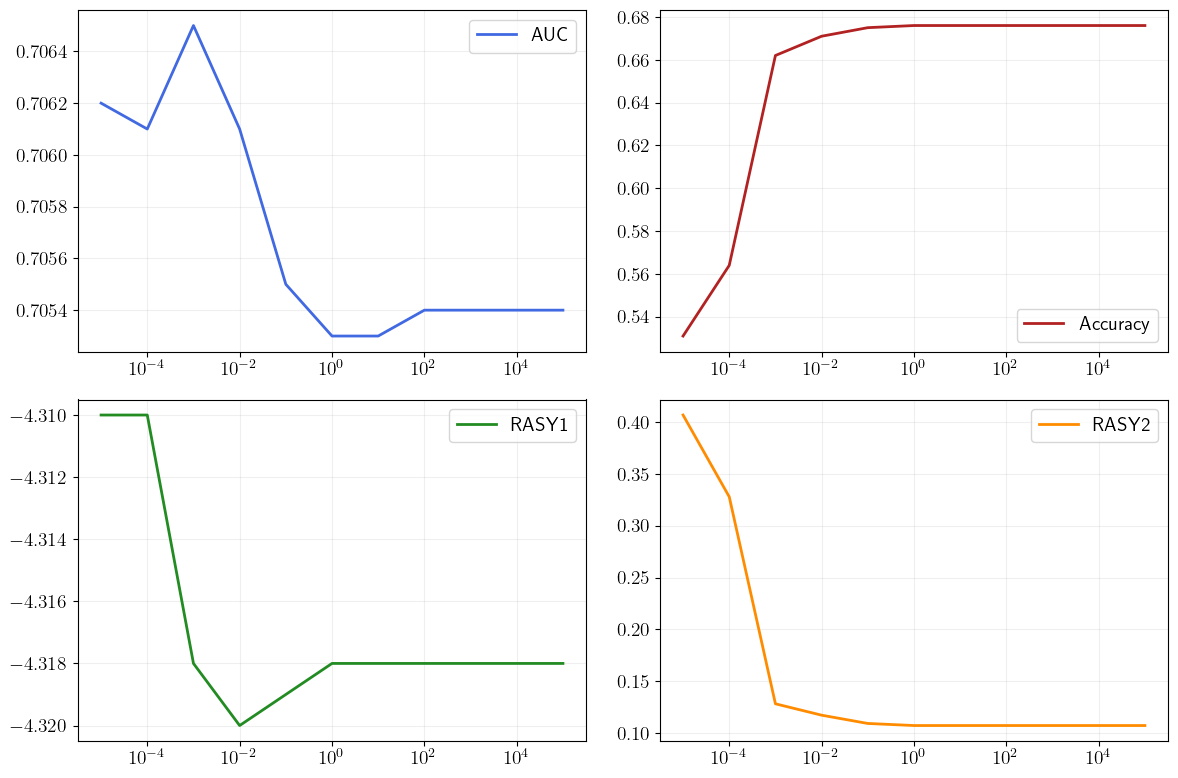

In [9]:
Cs_lr = LogisticRegressionValidate(dataset, features_cols_lr, np.logspace(-5, 5, 11))

### Naive Bayes

100%|██████████| 20/20 [00:02<00:00,  7.72it/s]


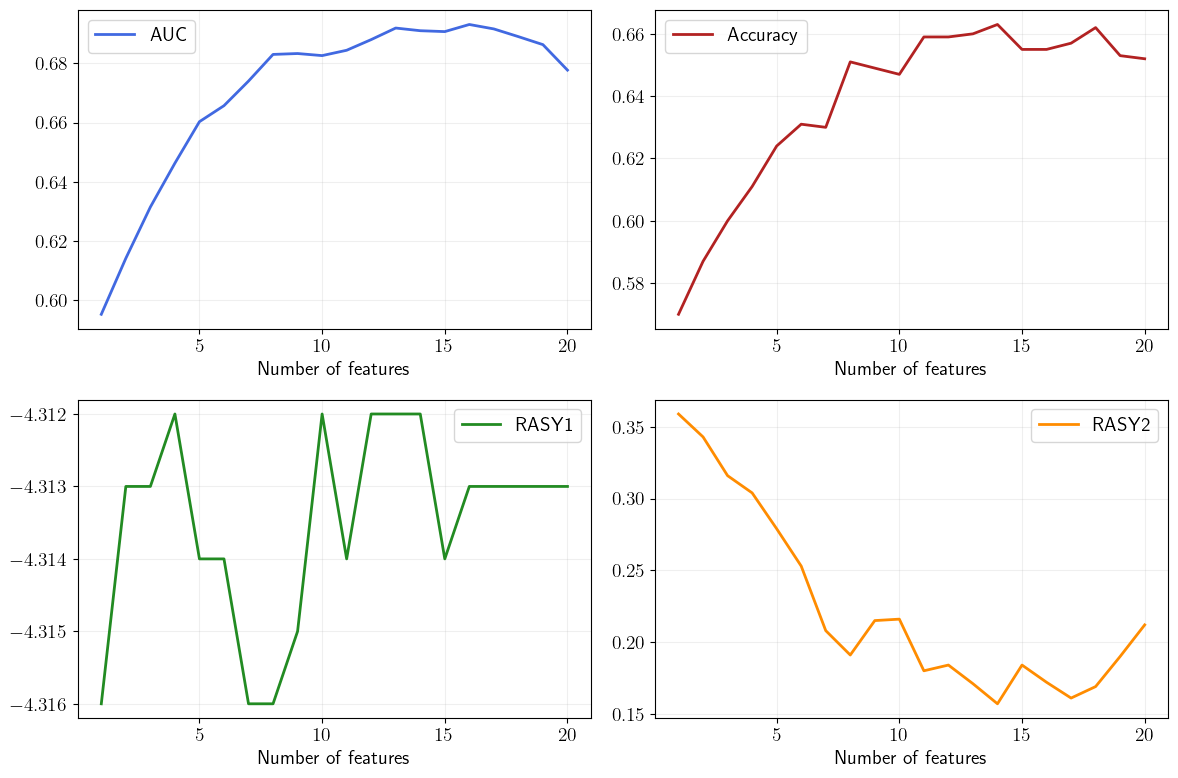

In [10]:
features_cols_gnb = dataset.metrics_n_features_dependence(GaussianNB())

### Saving aswers 

In [11]:
model_AUC = LogisticRegression(C=Cs_lr['AUC']['C'])
model_Accuracy = LogisticRegression(C=Cs_lr['Accuracy']['C'])
model_RASY1 = LogisticRegression(C=Cs_lr['RASY1']['C'])
model_RASY2 = LogisticRegression(C=Cs_lr['RASY2']['C'])
models = [model_AUC, model_Accuracy, model_RASY1, model_RASY2]

In [12]:
features_AUC, cols_AUC = features_cols_lr['AUC']['features'], features_cols_lr['AUC']['cols']
features_Accuracy, cols_Accuracy = features_cols_lr['Accuracy']['features'], features_cols_lr['Accuracy']['cols']
features_RASY1, cols_RASY1 = features_cols_lr['RASY1']['features'], features_cols_lr['RASY1']['cols']
features_RASY2, cols_RASY2 = features_cols_lr['RASY2']['features'], features_cols_lr['RASY2']['cols']
features_list = [features_AUC, features_Accuracy, features_RASY1, features_RASY2]
cols_list = [cols_AUC, cols_Accuracy, cols_RASY1, cols_RASY2]

In [13]:
t_Accuracy = features_cols_lr['Accuracy']['t']
t_RASY1 = features_cols_lr['RASY1']['t']
t_RASY2 = features_cols_lr['RASY2']['t']
thresholds_list = [t_Accuracy, t_RASY1, t_RASY2]

In [14]:
dataset.save_ans(models, features_list, cols_list, thresholds_list)

In [42]:
set(np.arange(20)) - set(cols_list[3])

{4, 8, 13, 18}

In [28]:
print(f"{Cs_lr['RASY2']['t']:.2f}")

0.53
